# Definisi Tujuan
Tentukan tujuan clustering, seperti:

- Mengelompokkan wilayah berdasarkan pola pemilih partai PKB.
- Identifikasi wilayah dengan karakteristik pemilih serupa untuk strategi kampanye partai PKB.


# Eksplorasi dan Preprocessing Data

- Memahami struktur data dari file yang  diunggah.
- Melakukan pengecekan terhadap nilai-nilai yang hilang (missing values), data duplikat, atau outlier yang mungkin memengaruhi hasil clustering.
- Melakukan normalisasi/penskalaan data karena clustering seperti K-Means sensitif terhadap skala data.

In [ ]:
# import relevant library for kmeans clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# display all the columns in dataset
pd.set_option('display.max_columns', None)

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/Muslim Milenials Bootcamp/Indekstat/Clustering/2710 Zonasi Kab. Nganjuk_Oktober 2024 (1).xlsx')
# Cari indeks dari baris yang berisi header (contoh: baris 4)

header_index = df[df.iloc[:, 0] == "PROVINSI"].index[0]

# Tetapkan baris tersebut sebagai header

df.columns = df.iloc[header_index]  # Jadikan baris itu sebagai nama kolom

df = df[header_index + 1:]  # Hapus semua baris sebelum header

# Reset indeks untuk membersihkan dfframe

df.reset_index(drop=True, inplace=True)

# Tampilkan hasil
df

4,PROVINSI,KAB/KOTA,DAPIL Kab,KECAMATAN,KELURAHAN,Kode Kel,JUMLAH TPS,DPT LAKI-LAKI,DPT PEREMPUAN,TOTAL DPT,KK,GOLPUT,PKB,GERINDRA,PDIP,GOLKAR,NASDEM,BURUH,GELORA,PKS,PKN,HANURA,GARUDA,PAN,PBB,DEMOKRAT,PSI,PERINDO,PPP,UMMAT,NILAI MAX,PEMENANG,Selisih dengan PKB,SASARAN PRIORITAS,VOTE BUYING,SKOR DPT PADAT,SKOR KK,SKOR GOLPUT,SKOR PKB,TOTAL SUARA,ZONA,BASIS,NaN,BASIS,%Desa,%Desa,DPT,% DPT
0,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BAGOR KULON,3518142007,11,1399,1418,2817,1408.5,519,392,333,452,78,131,4,2,31,1,120,4,44,0,688,12,0,4,2,688,DEMOKRAT,0.430233,4,0,3,3,2,3,11,Zona 2,Kalah,NaN,Basis,64,0.225352,242808,0.283727
1,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BALONGREJO,3518142001,11,1446,1487,2933,1466.5,545,852,147,338,76,171,8,8,197,0,124,3,20,1,424,5,1,9,4,852,PKB,0,4,0,3,3,3,4,13,Zona 2,Basis,NaN,Tempur,11,0.038732,29911,0.034952
2,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BANARAN KULON,3518142020,17,2188,2167,4355,2177.5,655,433,163,694,219,108,8,9,338,1,185,2,29,1,1490,12,1,5,2,1490,DEMOKRAT,0.709396,4,0,4,4,3,3,14,Zona 1,Kalah,NaN,Kalah,209,0.735915,583060,0.681321
3,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BANARAN WETAN,3518142021,12,1592,1618,3210,1605,462,383,383,502,49,100,1,5,59,0,34,1,16,1,1201,6,0,6,1,1201,DEMOKRAT,0.681099,4,0,3,3,2,3,11,Zona 2,Kalah,NaN,Total,284,1,855779,1
4,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BUDURAN,3518142005,5,556,577,1133,566.5,225,115,58,104,10,143,1,2,10,0,31,1,17,0,406,6,1,3,0,406,DEMOKRAT,0.716749,4,0,1,1,1,1,4,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,NGADIPIRO,3518152003,11,1425,1451,2876,1438,771,388,669,560,43,37,16,2,22,1,15,4,11,0,308,9,10,8,2,669,GERINDRA,0.42003,2,1,3,3,3,3,12,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN
280,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,NGUDIKAN,3518152005,15,2008,2015,4023,2011.5,703,955,690,571,118,110,8,7,80,1,89,6,26,2,625,12,9,8,3,955,PKB,0,2,1,4,4,3,4,15,Zona 1,Basis,NaN,NaN,NaN,NaN,NaN,NaN
281,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,SUDIMOROHARJO,3518152001,20,2721,2652,5373,2686.5,1431,767,992,706,89,122,16,4,19,0,19,14,13,1,1158,9,3,8,2,1158,DEMOKRAT,0.337651,2,1,4,4,4,4,16,Zona 1,Kalah,NaN,NaN,NaN,NaN,NaN,NaN
282,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,SUKOHARJO,3518152006,13,1747,1767,3514,1757,521,495,503,533,122,335,6,3,349,2,92,2,25,3,507,4,1,7,4,533,PDIP,0.071295,2,1,3,3,3,3,12,Zona 2,Tempur,NaN,NaN,NaN,NaN,NaN,NaN


Kolom yang akan digunakan adalah `TOTAL DPT`, `KK`, `GOLPUT`, `PKB`.

- **`TOTAL DPT`**: Total jumlah pemilih terdaftar.
- **`KK`**: Jumlah kepala keluarga.
- **`GOLPUT`**: Jumlah pemilih golput.
- **`PKB`**: Jumlah pemilih untuk partai PKB.

In [ ]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROVINSI            284 non-null    object 
 1   KAB/KOTA            284 non-null    object 
 2   DAPIL Kab           284 non-null    object 
 3   KECAMATAN           284 non-null    object 
 4   KELURAHAN           284 non-null    object 
 5   Kode Kel            284 non-null    object 
 6   JUMLAH TPS          284 non-null    object 
 7   DPT LAKI-LAKI       284 non-null    object 
 8   DPT PEREMPUAN       284 non-null    object 
 9   TOTAL DPT           284 non-null    object 
 10  KK                  284 non-null    object 
 11  GOLPUT              284 non-null    object 
 12  PKB                 284 non-null    object 
 13  GERINDRA            284 non-null    object 
 14  PDIP                284 non-null    object 
 15  GOLKAR              284 non-null    object 
 16  NASDEM  

In [ ]:
# check duplicate data
df.duplicated().sum()

0

In [ ]:
# check column names
df.columns

Index([          'PROVINSI',           'KAB/KOTA',          'DAPIL Kab',
                'KECAMATAN',          'KELURAHAN',           'Kode Kel',
               'JUMLAH TPS',      'DPT LAKI-LAKI',      'DPT PEREMPUAN',
                'TOTAL DPT',                 'KK',             'GOLPUT',
                      'PKB',           'GERINDRA',               'PDIP',
                   'GOLKAR',             'NASDEM',              'BURUH',
                   'GELORA',                'PKS',                'PKN',
                   'HANURA',             'GARUDA',                'PAN',
                      'PBB',           'DEMOKRAT',                'PSI',
                  'PERINDO',                'PPP',              'UMMAT',
                'NILAI MAX',           'PEMENANG', 'Selisih dengan PKB',
        'SASARAN PRIORITAS',        'VOTE BUYING',     'SKOR DPT PADAT',
                  'SKOR KK',        'SKOR GOLPUT',           'SKOR PKB',
              'TOTAL SUARA',               'ZONA', 

In [ ]:
# pilih relevant columns
df_cluster = df[['TOTAL DPT', 'KK', 'GOLPUT', 'PKB']]

In [ ]:
# descriptive statistic
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TOTAL DPT  284 non-null    object
 1   KK         284 non-null    object
 2   GOLPUT     284 non-null    object
 3   PKB        284 non-null    object
dtypes: object(4)
memory usage: 9.0+ KB


In [ ]:
df_cluster.duplicated().sum()

0

In [ ]:
# descriptive statistic
df_cluster.describe()

4,TOTAL DPT,KK,GOLPUT,PKB
count,284,284.0,284,284
unique,276,276.0,252,241
top,5323,2661.5,515,279
freq,2,2.0,3,4


Pertanyaan:

Kenapa kolom KK Dtype nya **float**?

<Axes: >

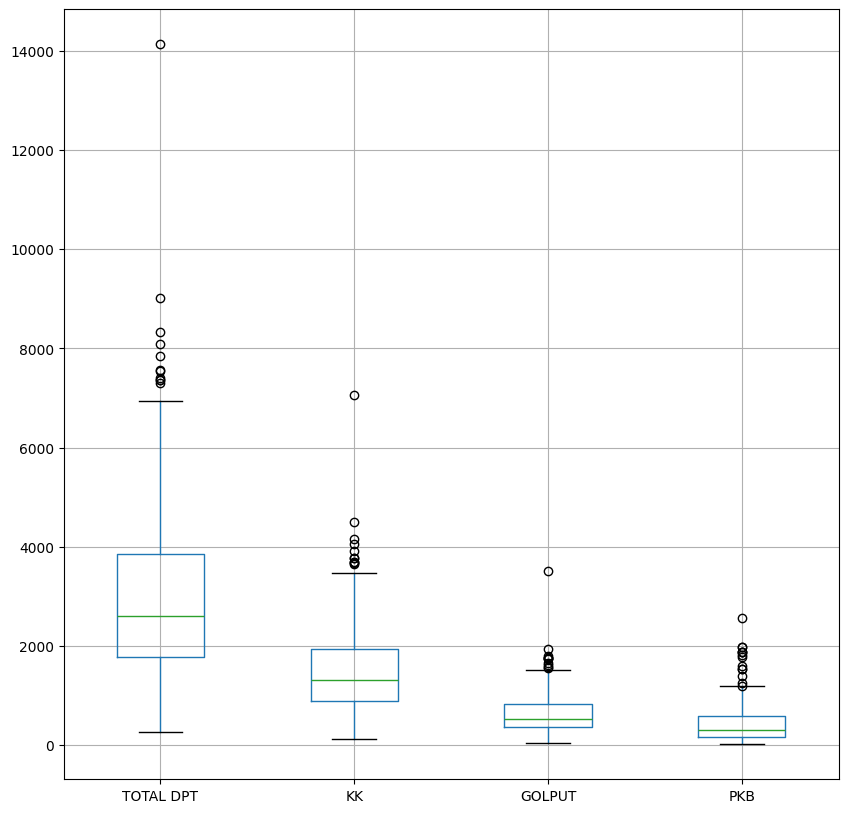

In [ ]:
# Convert the relevant columns to numerical data types
df_cluster = df_cluster.astype({'TOTAL DPT': 'int64', 'KK': 'int64', 'GOLPUT': 'int64', 'PKB': 'int64'})

# Now try creating the boxplot
df_cluster.boxplot(figsize=(10,10))

In [ ]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(df_cluster)

# Convert normalized data back to a DataFrame for readability
normalized_df = pd.DataFrame(normalized_data, columns=df_cluster.columns)
normalized_df.head()

4,TOTAL DPT,KK,GOLPUT,PKB
0,0.184432,0.184374,0.137565,0.146322
1,0.192793,0.192735,0.145032,0.326291
2,0.295279,0.295228,0.176623,0.162363
3,0.212757,0.212772,0.121195,0.142801
4,0.063063,0.062996,0.053130,0.037950


# 2. Penerapan Clustering

- Gunakan algoritma clustering yaitu K-Means.
- Tentukan jumlah cluster yang optimal menggunakan metode seperti Elbow Method atau Silhouette Score.
- Buat interpretasi setiap cluster dan hubungkan dengan zona kampanye.

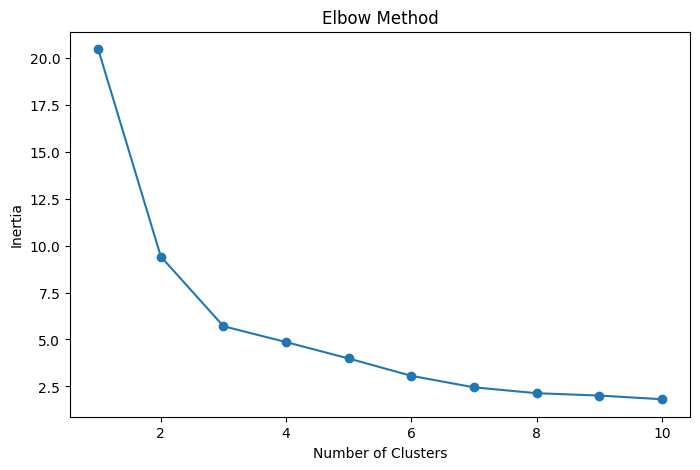

In [ ]:
# Uji dengan beberapa jumlah cluster dengan metode elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Berdasarkan metode **Elbow**, jumlah cluster optimal adalah 3 (`k=3`)

In [ ]:
# Terapkan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Tambahkan hasil cluster ke data asli
df['Cluster'] = clusters
print(df[['TOTAL DPT', 'KK', 'GOLPUT', 'PKB', 'Cluster']].head())

4 TOTAL DPT      KK GOLPUT  PKB  Cluster
0      2817  1408.5    519  392        0
1      2933  1466.5    545  852        1
2      4355  2177.5    655  433        1
3      3210    1605    462  383        0
4      1133   566.5    225  115        0


In [ ]:
df

4,PROVINSI,KAB/KOTA,DAPIL Kab,KECAMATAN,KELURAHAN,Kode Kel,JUMLAH TPS,DPT LAKI-LAKI,DPT PEREMPUAN,TOTAL DPT,KK,GOLPUT,PKB,GERINDRA,PDIP,GOLKAR,NASDEM,BURUH,GELORA,PKS,PKN,HANURA,GARUDA,PAN,PBB,DEMOKRAT,PSI,PERINDO,PPP,UMMAT,NILAI MAX,PEMENANG,Selisih dengan PKB,SASARAN PRIORITAS,VOTE BUYING,SKOR DPT PADAT,SKOR KK,SKOR GOLPUT,SKOR PKB,TOTAL SUARA,ZONA,BASIS,NaN,BASIS,%Desa,%Desa,DPT,% DPT,Cluster
0,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BAGOR KULON,3518142007,11,1399,1418,2817,1408.5,519,392,333,452,78,131,4,2,31,1,120,4,44,0,688,12,0,4,2,688,DEMOKRAT,0.430233,4,0,3,3,2,3,11,Zona 2,Kalah,NaN,Basis,64,0.225352,242808,0.283727,0
1,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BALONGREJO,3518142001,11,1446,1487,2933,1466.5,545,852,147,338,76,171,8,8,197,0,124,3,20,1,424,5,1,9,4,852,PKB,0,4,0,3,3,3,4,13,Zona 2,Basis,NaN,Tempur,11,0.038732,29911,0.034952,1
2,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BANARAN KULON,3518142020,17,2188,2167,4355,2177.5,655,433,163,694,219,108,8,9,338,1,185,2,29,1,1490,12,1,5,2,1490,DEMOKRAT,0.709396,4,0,4,4,3,3,14,Zona 1,Kalah,NaN,Kalah,209,0.735915,583060,0.681321,1
3,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BANARAN WETAN,3518142021,12,1592,1618,3210,1605,462,383,383,502,49,100,1,5,59,0,34,1,16,1,1201,6,0,6,1,1201,DEMOKRAT,0.681099,4,0,3,3,2,3,11,Zona 2,Kalah,NaN,Total,284,1,855779,1,0
4,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BUDURAN,3518142005,5,556,577,1133,566.5,225,115,58,104,10,143,1,2,10,0,31,1,17,0,406,6,1,3,0,406,DEMOKRAT,0.716749,4,0,1,1,1,1,4,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,NGADIPIRO,3518152003,11,1425,1451,2876,1438,771,388,669,560,43,37,16,2,22,1,15,4,11,0,308,9,10,8,2,669,GERINDRA,0.42003,2,1,3,3,3,3,12,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,1
280,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,NGUDIKAN,3518152005,15,2008,2015,4023,2011.5,703,955,690,571,118,110,8,7,80,1,89,6,26,2,625,12,9,8,3,955,PKB,0,2,1,4,4,3,4,15,Zona 1,Basis,NaN,NaN,NaN,NaN,NaN,NaN,1
281,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,SUDIMOROHARJO,3518152001,20,2721,2652,5373,2686.5,1431,767,992,706,89,122,16,4,19,0,19,14,13,1,1158,9,3,8,2,1158,DEMOKRAT,0.337651,2,1,4,4,4,4,16,Zona 1,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,1
282,JAWA TIMUR,NGANJUK,NGANJUK 1,WILANGAN,SUKOHARJO,3518152006,13,1747,1767,3514,1757,521,495,503,533,122,335,6,3,349,2,92,2,25,3,507,4,1,7,4,533,PDIP,0.071295,2,1,3,3,3,3,12,Zona 2,Tempur,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df.columns

Index([          'PROVINSI',           'KAB/KOTA',          'DAPIL Kab',
                'KECAMATAN',          'KELURAHAN',           'Kode Kel',
               'JUMLAH TPS',      'DPT LAKI-LAKI',      'DPT PEREMPUAN',
                'TOTAL DPT',                 'KK',             'GOLPUT',
                      'PKB',           'GERINDRA',               'PDIP',
                   'GOLKAR',             'NASDEM',              'BURUH',
                   'GELORA',                'PKS',                'PKN',
                   'HANURA',             'GARUDA',                'PAN',
                      'PBB',           'DEMOKRAT',                'PSI',
                  'PERINDO',                'PPP',              'UMMAT',
                'NILAI MAX',           'PEMENANG', 'Selisih dengan PKB',
        'SASARAN PRIORITAS',        'VOTE BUYING',     'SKOR DPT PADAT',
                  'SKOR KK',        'SKOR GOLPUT',           'SKOR PKB',
              'TOTAL SUARA',               'ZONA', 

In [ ]:
# prompt: save df as excel with only DAPIL - KAB, KECAMATAN, KELURAHAN, Kode Kel, Jumlah TPS, DPT Laki-Laki, DPT Perempuan, Total DPT, KK, Golput, PKB, Clustering

# Assuming 'df' is already defined as in the provided code.
# Select the specified columns.
selected_columns = ['DAPIL Kab', 'KECAMATAN', 'KELURAHAN', 'Kode Kel', 'JUMLAH TPS', 'DPT LAKI-LAKI', 'DPT PEREMPUAN', 'TOTAL DPT', 'KK', 'GOLPUT', 'PKB', 'Cluster']
df_selected = df[selected_columns]

# Save the DataFrame to an Excel file.
df_selected.to_excel('output.xlsx', index=False)

In [ ]:
# save df as excel file
df.to_excel('hasil_clustering.xlsx', index=False)

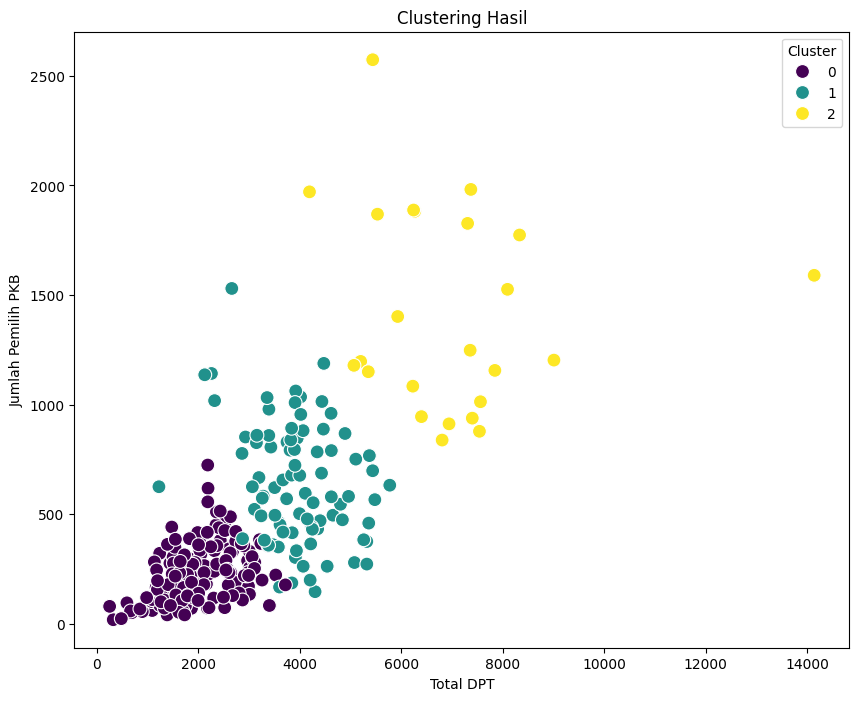

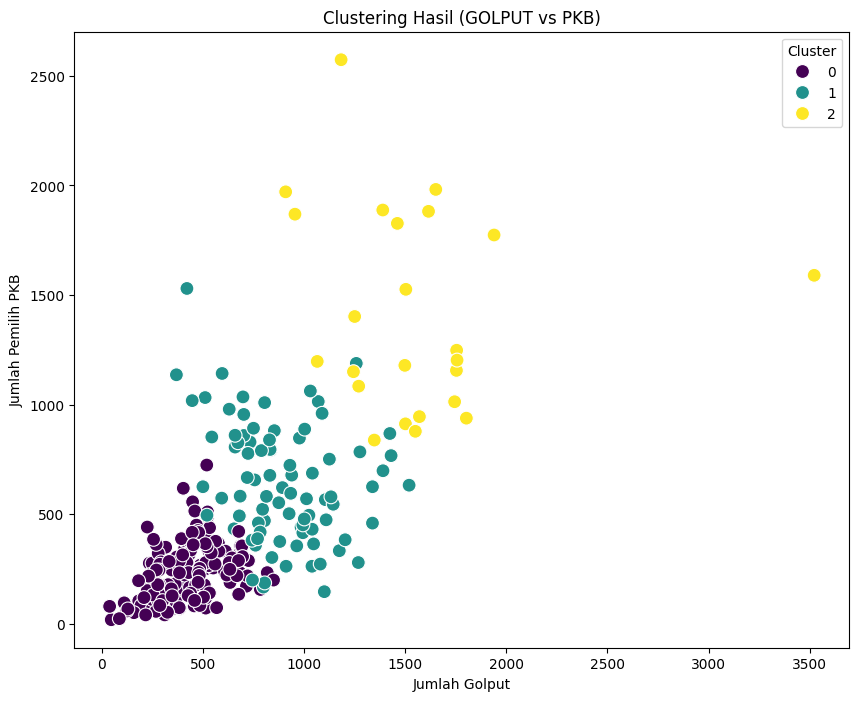

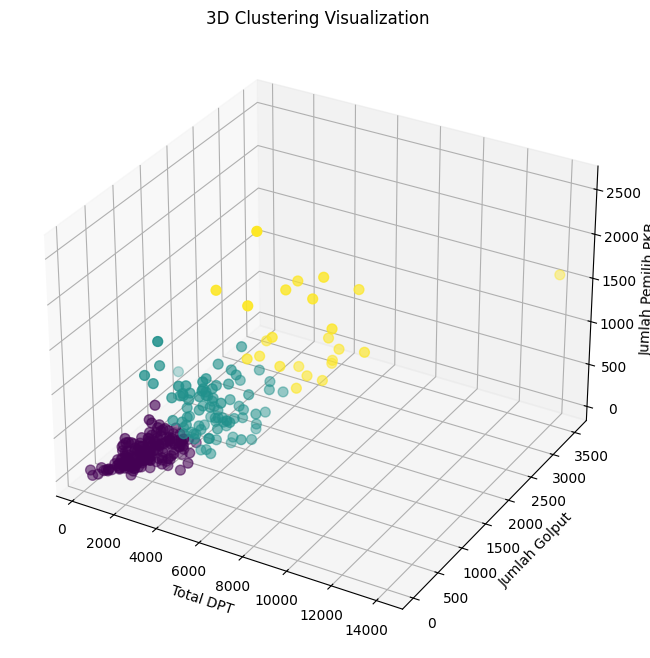

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TOTAL DPT', y='PKB', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering Hasil')
plt.xlabel('Total DPT')
plt.ylabel('Jumlah Pemilih PKB')
plt.show()

# Visualisasi dengan kolom lain (contoh: GOLPUT)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='GOLPUT', y='PKB', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering Hasil (GOLPUT vs PKB)')
plt.xlabel('Jumlah Golput')
plt.ylabel('Jumlah Pemilih PKB')
plt.show()

# 3D scatter plot (jika ingin visualisasi 3 dimensi)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TOTAL DPT'], df['GOLPUT'], df['PKB'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Total DPT')
ax.set_ylabel('Jumlah Golput')
ax.set_zlabel('Jumlah Pemilih PKB')
plt.title('3D Clustering Visualization')
plt.show()

# # Pairplot untuk melihat hubungan antar variabel
# sns.pairplot(df, hue='Cluster', vars=['TOTAL DPT', 'KK', 'GOLPUT', 'PKB'], palette='viridis')
# plt.show()

# 3. Analisis dan Penentuan Zona



- Analisis hasil clustering untuk menentukan zona prioritas kampanye (zona 1, 2, 3).
- Berikan rekomendasi strategi berdasarkan cluster.

In [ ]:
# Calculate average characteristics of each cluster
cluster_summary_avg = df.groupby('Cluster')[['TOTAL DPT', 'KK', 'GOLPUT', 'PKB']].mean()
cluster_summary_avg

4,TOTAL DPT,KK,GOLPUT,PKB
Cluster,,,,
0,1992.32948,996.16474,407.33526,221.306358
1,3948.827586,1974.413793,892.931034,636.241379
2,6981.583333,3490.791667,1552.25,1417.75


In [ ]:
df[df['KELURAHAN'].duplicated()]

4,PROVINSI,KAB/KOTA,DAPIL Kab,KECAMATAN,KELURAHAN,Kode Kel,JUMLAH TPS,DPT LAKI-LAKI,DPT PEREMPUAN,TOTAL DPT,KK,GOLPUT,PKB,GERINDRA,PDIP,GOLKAR,NASDEM,BURUH,GELORA,PKS,PKN,HANURA,GARUDA,PAN,PBB,DEMOKRAT,PSI,PERINDO,PPP,UMMAT,NILAI MAX,PEMENANG,Selisih dengan PKB,SASARAN PRIORITAS,VOTE BUYING,SKOR DPT PADAT,SKOR KK,SKOR GOLPUT,SKOR PKB,TOTAL SUARA,ZONA,BASIS,NaN,BASIS,%Desa,%Desa,DPT,% DPT,Cluster
32,JAWA TIMUR,NGANJUK,NGANJUK 5,BERBEK,BALONGREJO,3518032018,11,1528,1487,3015,1507.5,622,255,145,227,1011,97,2,11,75,0,182,1,17,0,289,5,7,61,8,1011,GOLKAR,0.747774,3,1,3,3,3,2,11,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
86,JAWA TIMUR,NGANJUK,NGANJUK 3,KERTOSONO,KUTOREJO,3518082010,7,869,882,1751,875.5,458,81,65,206,100,19,12,4,355,2,6,0,41,1,155,18,3,224,1,355,PKS,0.771831,3,0,1,1,2,1,5,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
136,JAWA TIMUR,NGANJUK,NGANJUK 1,NGANJUK,JATIREJO,3518131001,17,2210,2221,4431,2215.5,1042,687,344,597,203,175,24,14,242,5,286,7,42,10,658,67,6,17,5,687,PKB,0,4,1,4,4,4,4,16,Zona 1,Basis,NaN,NaN,NaN,NaN,NaN,NaN,1
159,JAWA TIMUR,NGANJUK,NGANJUK 2,NGLUYU,SUGIHWARAS,3518182001,7,873,871,1744,872,226,151,102,127,714,145,2,2,7,1,148,0,86,0,16,3,12,2,0,714,GOLKAR,0.788515,2,1,1,1,1,1,4,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
166,JAWA TIMUR,NGANJUK,NGANJUK 3,NGRONGGOT,KALIANYAR,3518072012,12,1556,1561,3117,1558.5,631,279,148,996,637,32,23,5,83,0,129,0,28,0,45,17,3,59,2,996,PDIP,0.71988,4,1,3,3,3,2,11,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
175,JAWA TIMUR,NGANJUK,NGANJUK 4,PACE,BANARAN,3518052011,8,1069,1048,2117,1058.5,430,233,193,478,215,95,1,4,8,1,44,2,20,1,291,8,1,92,0,478,PDIP,0.512552,2,0,2,2,2,2,8,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
179,JAWA TIMUR,NGANJUK,NGANJUK 4,PACE,GEMENGGENG,3518052015,10,1337,1294,2631,1315.5,542,323,187,1264,47,36,6,3,2,2,58,1,18,1,86,3,3,48,1,1264,PDIP,0.744462,2,0,3,3,3,3,12,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
192,JAWA TIMUR,NGANJUK,NGANJUK 2,PATIANROWO,BABADAN,3518092002,23,3201,3043,6244,3122,1390,1888,422,325,124,1195,15,10,24,1,423,3,70,1,262,16,39,27,9,1888,PKB,0,4,1,4,4,4,4,16,Zona 1,Basis,NaN,NaN,NaN,NaN,NaN,NaN,2
195,JAWA TIMUR,NGANJUK,NGANJUK 2,PATIANROWO,NGEPUNG,3518092003,24,3238,3161,6399,3199.5,1571,945,736,451,296,1481,20,11,38,6,295,8,59,3,346,29,59,33,12,1481,NASDEM,0.361918,4,1,4,4,4,4,16,Zona 1,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,2
208,JAWA TIMUR,NGANJUK,NGANJUK 3,PRAMBON,NGLAWAK,3518062005,5,629,642,1271,635.5,368,100,221,190,23,51,0,1,25,0,9,0,12,0,236,6,11,17,1,236,DEMOKRAT,0.576271,1,0,1,1,2,1,5,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# tampilkan data kelurahan yang duplikat
duplicate_kelurahan = df[df.duplicated(subset='KELURAHAN', keep=False)]
duplicate_kelurahan

4,PROVINSI,KAB/KOTA,DAPIL Kab,KECAMATAN,KELURAHAN,Kode Kel,JUMLAH TPS,DPT LAKI-LAKI,DPT PEREMPUAN,TOTAL DPT,KK,GOLPUT,PKB,GERINDRA,PDIP,GOLKAR,NASDEM,BURUH,GELORA,PKS,PKN,HANURA,GARUDA,PAN,PBB,DEMOKRAT,PSI,PERINDO,PPP,UMMAT,NILAI MAX,PEMENANG,Selisih dengan PKB,SASARAN PRIORITAS,VOTE BUYING,SKOR DPT PADAT,SKOR KK,SKOR GOLPUT,SKOR PKB,TOTAL SUARA,ZONA,BASIS,NaN,BASIS,%Desa,%Desa,DPT,% DPT,Cluster
1,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,BALONGREJO,3518142001,11,1446,1487,2933,1466.5,545,852,147,338,76,171,8,8,197,0,124,3,20,1,424,5,1,9,4,852,PKB,0,4,0,3,3,3,4,13,Zona 2,Basis,NaN,Tempur,11,0.038732,29911,0.034952,1
6,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,GEMENGGENG,3518142018,8,988,1023,2011,1005.5,254,134,53,142,19,22,1,1,125,0,17,3,12,0,1215,7,2,3,1,1215,DEMOKRAT,0.889712,4,0,2,2,1,1,6,Zona 3,Kalah,NaN,Keterangan Sasaran Prioritas,UV,SUARA MARHAEN TIDAK MANTAP,NaN,NaN,0
13,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,KUTOREJO,3518142016,6,732,734,1466,733,244,184,238,308,12,23,6,2,25,3,39,0,7,0,370,4,0,1,0,370,DEMOKRAT,0.502703,4,0,1,1,1,2,5,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
20,JAWA TIMUR,NGANJUK,NGANJUK 1,BAGOR,SUGIHWARAS,3518142017,10,1283,1329,2612,1306,411,344,237,436,146,59,3,2,29,0,46,0,17,1,862,5,1,10,3,862,DEMOKRAT,0.600928,4,0,3,3,2,3,11,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
32,JAWA TIMUR,NGANJUK,NGANJUK 5,BERBEK,BALONGREJO,3518032018,11,1528,1487,3015,1507.5,622,255,145,227,1011,97,2,11,75,0,182,1,17,0,289,5,7,61,8,1011,GOLKAR,0.747774,3,1,3,3,3,2,11,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
63,JAWA TIMUR,NGANJUK,NGANJUK 2,GONDANG,SANGGRAHAN,3518172011,10,1344,1336,2680,1340,580,331,212,864,54,286,6,9,16,2,19,2,34,0,152,7,92,10,4,864,PDIP,0.616898,1,0,3,3,3,3,12,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
79,JAWA TIMUR,NGANJUK,NGANJUK 3,KERTOSONO,BANARAN,3518081011,16,2106,2198,4304,2152,1101,146,80,354,432,16,11,1,1250,2,17,2,30,0,124,59,18,660,1,1250,PKS,0.8832,3,0,4,4,4,1,13,Zona 2,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,1
83,JAWA TIMUR,NGANJUK,NGANJUK 3,KERTOSONO,KALIANYAR,3518082004,6,855,804,1659,829.5,364,182,84,141,402,15,23,4,106,0,43,0,6,0,216,5,2,65,1,402,GOLKAR,0.547264,3,0,1,1,1,2,5,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
86,JAWA TIMUR,NGANJUK,NGANJUK 3,KERTOSONO,KUTOREJO,3518082010,7,869,882,1751,875.5,458,81,65,206,100,19,12,4,355,2,6,0,41,1,155,18,3,224,1,355,PKS,0.771831,3,0,1,1,2,1,5,Zona 3,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,0
88,JAWA TIMUR,NGANJUK,NGANJUK 3,KERTOSONO,NGLAWAK,3518082006,16,2100,2138,4238,2119,986,441,106,418,294,36,27,10,1096,8,79,1,45,2,353,26,3,304,3,1096,PKS,0.597628,3,0,4,4,4,3,15,Zona 1,Kalah,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# prompt: hasilkan cluster per KELURAHAN serta Kode Kel

# Group data by 'KELURAHAN' and 'Kode Kel' and get the first occurrence of each group
clustered_kelurahan = df.groupby(['KELURAHAN', 'Kode Kel']).first().reset_index()

# Select the desired columns for the final output
final_columns = ['KELURAHAN', 'Kode Kel', 'Cluster']
final_df = clustered_kelurahan[final_columns]

# Display the resulting DataFrame
final_df

# # Save the clustered data to an Excel file
# final_df.to_excel('clustered_kelurahan.xlsx', index=False)

4,KELURAHAN,Kode Kel,Cluster
0,BABADAN,3518052009,0
1,BABADAN,3518092002,2
2,BAGOR KULON,3518142007,0
3,BAGOR WETAN,3518122010,0
4,BAJANG,3518182006,0
...,...,...,...
279,WATUDANDANG,3518062012,2
280,WAUNG,3518102004,1
281,WENGKAL,3518162020,0
282,WERUNGOTOK,3518131006,1


In [ ]:
# Save the clustered data to an Excel file
final_df.to_excel('clustered_kelurahan.xlsx', index=False)

In [ ]:
# Mengelompokkan data berdasarkan kolom 'Cluster' dan mengambil kolom 'KELURAHAN' dan 'Kode Kel'
cluster_kelurahan = df.groupby('Cluster')[['KELURAHAN', 'Kode Kel']].agg(list)

# Menampilkan hasil
cluster_kelurahan

4,KELURAHAN,Kode Kel
Cluster,,
0,"[BAGOR KULON, BANARAN WETAN, BUDURAN, GANDU, G...","[3518142007, 3518142021, 3518142005, 351814201..."
1,"[BALONGREJO, BANARAN KULON, NGUMPUL, SELOREJO,...","[3518142001, 3518142020, 3518142006, 351814201..."
2,"[JEKEK, KATERBAN, DRENGES, MACANAN, NGEPEH, CE...","[3518102008, 3518102009, 3518082001, 351804202..."


In [ ]:
# Mengelompokkan data berdasarkan 'Cluster' dan menggabungkan data menjadi list
cluster_kelurahan = df.groupby('Cluster')[['KELURAHAN', 'Kode Kel']].agg(list)

# Mengubah list menjadi format vertikal dengan explode
cluster_kelurahan_exploded = cluster_kelurahan.explode('KELURAHAN').explode('Kode Kel').reset_index()

# Menampilkan hasil
cluster_kelurahan_exploded

4,Cluster,KELURAHAN,Kode Kel
0,0,BAGOR KULON,3518142007
1,0,BAGOR KULON,3518142021
2,0,BAGOR KULON,3518142005
3,0,BAGOR KULON,3518142012
4,0,BAGOR KULON,3518142018
...,...,...,...
38069,2,WARUJAYENG,3518112010
38070,2,WARUJAYENG,3518112014
38071,2,WARUJAYENG,3518112009
38072,2,WARUJAYENG,3518112002


In [ ]:
# Save the clustered data to an Excel file
cluster_kelurahan_exploded.to_excel('cluster_kelurahan_exploded.xlsx', index=False)

In [ ]:
# Calculate average characteristics of each cluster
cluster_summary_sum = df.groupby('Cluster')[['TOTAL DPT', 'KK', 'GOLPUT', 'PKB']].sum()
cluster_summary_sum

4,TOTAL DPT,KK,GOLPUT,PKB
Cluster,,,,
0,344673,172290,70469,38286
1,343548,171751,77685,55353
2,167558,83773,37254,34026


In [ ]:
# Calculate percentages for each column within each cluster
cluster_summary_percentage = cluster_summary_sum.div(cluster_summary_sum.sum(axis=1), axis=0) * 100
cluster_summary_percentage

4,TOTAL DPT,KK,GOLPUT,PKB
Cluster,,,,
0,55.084399,27.534768,11.262102,6.118731
1,52.989109,26.491007,11.982194,8.537690
2,51.938093,25.967186,11.547653,10.547068


In [ ]:
# Check the distribution of clusters
cluster_distribution = df['Cluster'].value_counts()

cluster_distribution

,count
Cluster,
0,173
1,87
2,24


<ipython-input-28-79846e03fa44>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette='viridis')


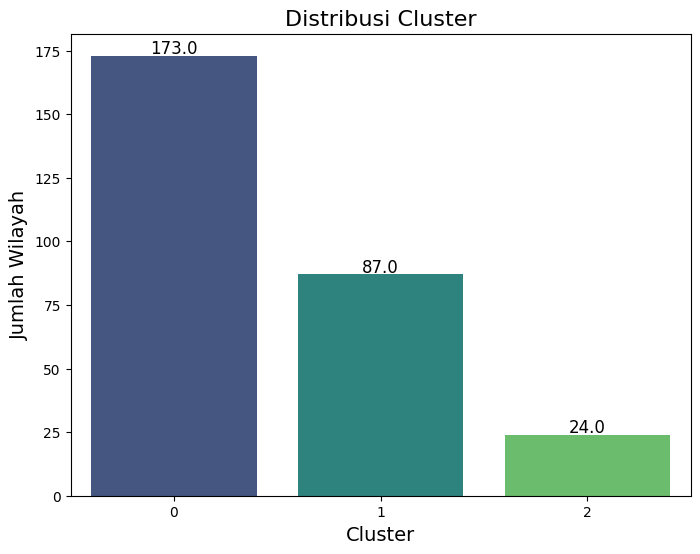

In [ ]:
# Check the distribution of clusters
cluster_distribution = df['Cluster'].value_counts()

# Plot distribution of clusters
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette='viridis')
plt.title('Distribusi Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Jumlah Wilayah', fontsize=14)

# Add frequency labels to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

<Figure size 1000x600 with 0 Axes>

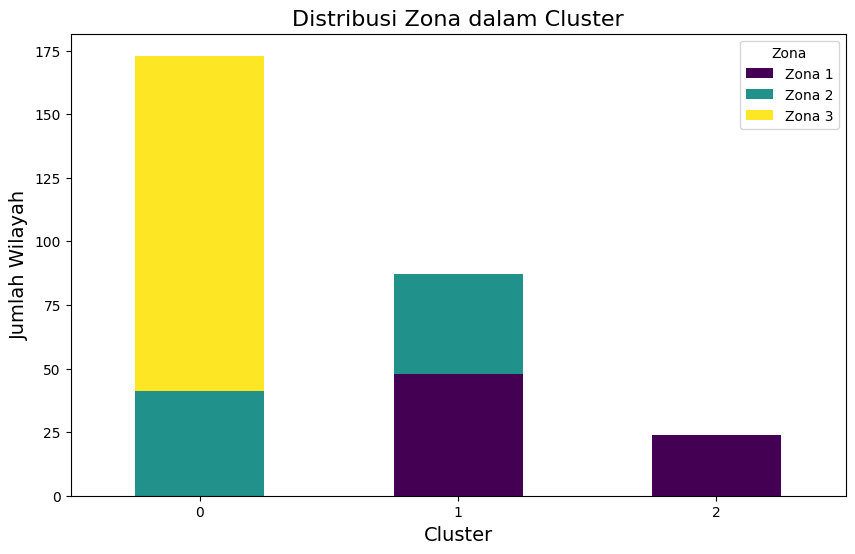

ZONA,Zona 1,Zona 2,Zona 3
Cluster,,,
0,0,41,132
1,48,39,0
2,24,0,0


In [ ]:
# Re-analyzing and manually plotting the distribution of zones within clusters.
zone_distribution = df.groupby(['Cluster', 'ZONA']).size().unstack(fill_value=0)

# Plot distribution of zones within clusters
plt.figure(figsize=(10, 6))
zone_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Distribusi Zona dalam Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Jumlah Wilayah', fontsize=14)
plt.legend(title='Zona', loc='upper right')
plt.xticks(rotation=0)
plt.show()

zone_distribution

In [ ]:
# Calculate the percentage distribution of zones within each cluster
zone_distribution_percentage = zone_distribution.div(zone_distribution.sum(axis=1), axis=0) * 100

zone_distribution_percentage

ZONA,Zona 1,Zona 2,Zona 3
Cluster,,,
0,0.000000,23.699422,76.300578
1,55.172414,44.827586,0.000000
2,100.000000,0.000000,0.000000


**Interpretasi Awal**

1. `Cluster 2` adalah wilayah dengan potensi pemilih PKB terbesar namun memiliki angka GOLPUT tinggi. Wilayah ini dapat dianggap sebagai **Zona 1 (prioritas utama)**.
2. `Cluster 1` memiliki tingkat pemilih PKB moderat dan jumlah GOLPUT lebih rendah dibanding Cluster 2. Wilayah ini cocok sebagai **Zona 2 (prioritas normal)**.
3. `Cluster 0` memiliki jumlah pemilih PKB rendah dan GOLPUT relatif kecil, menjadikannya **Zona 3 (tidak prioritas)**.

**Distribusi Zona Berdasarkan Cluster**

1. **Cluster 0 (Zona 3):**
  - Wilayah ini memiliki jumlah TOTAL DPT, KK, dan pemilih PKB yang lebih rendah dibanding cluster lain.
  - Sebagian besar wilayah dalam cluster ini berada di Zona 3 (sangat tidak prioritas untuk kampanye).

2. **Cluster 1 (Zona 2)**:
  - Memiliki jumlah TOTAL DPT dan KK moderat, dengan jumlah pemilih PKB lebih tinggi dibanding Cluster 0.
  - Wilayah dalam cluster ini sebagian besar tergolong Zona 2 (tidak prioritas/normal kampanye).

3. **Cluster 2 (Zona 1)**:
  - Cluster dengan TOTAL DPT, KK, dan jumlah pemilih PKB tertinggi. Namun, angka GOLPUT juga paling tinggi.
  - Wilayah ini berada di Zona 1 (prioritas utama kampanye).

**Rekomendasi Strategi Kampanye Berdasarkan Zona**

1. **Zona 1 (Prioritas Utama):**
  - **Fokus utama** pada edukasi pemilih untuk menurunkan tingkat GOLPUT.
  - Kampanye langsung melalui pendekatan komunitas dan door-to-door, mengingat potensi besar PKB di wilayah ini.
  - Optimalkan penggunaan media lokal untuk memaksimalkan jangkauan.

2. **Zona 2 (Prioritas Normal):**
  - Pertahankan dukungan dengan aktivitas rutin, seperti dialog masyarakat.
  - Hindari alokasi sumber daya yang terlalu besar, fokus pada mempertahankan suara PKB yang ada.

3. **Zona 3 (Tidak Prioritas):**
  - Minimalkan sumber daya di wilayah ini, kecuali jika ada potensi pertumbuhan suara yang tidak teridentifikasi.
  - Kampanye ringan, seperti pemasangan baliho atau materi promosi pasif.